In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 30
pd.options.display.max_columns = 50

## Explonatory Data Analysis

In [2]:
# reading the data
data = pd.read_csv("data/data.csv", index_col=False)

In [3]:
# creating copied version of the data
df = data.copy()
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [5]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
# checking number of N/A values
df.isna().sum().sum()

np.int64(5000)

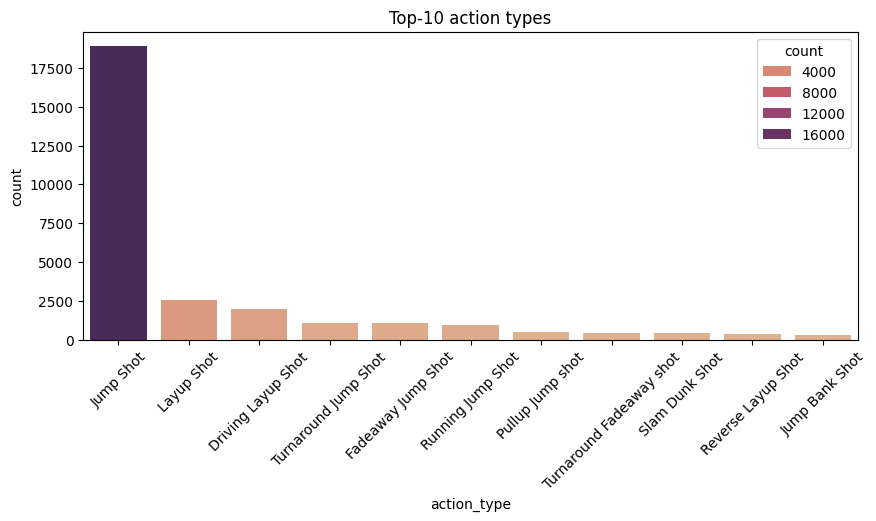

In [7]:
# plotting the top-10 action types
top_10_action_types = df['action_type'].value_counts().reset_index().loc[:10]

plt.figure(figsize=(10, 4))

sns.barplot(
    data=top_10_action_types,
    x='action_type',
    y='count',
    hue='count',
    palette='flare'
)

plt.title("Top-10 action types")
plt.xticks(rotation=45)
plt.show()

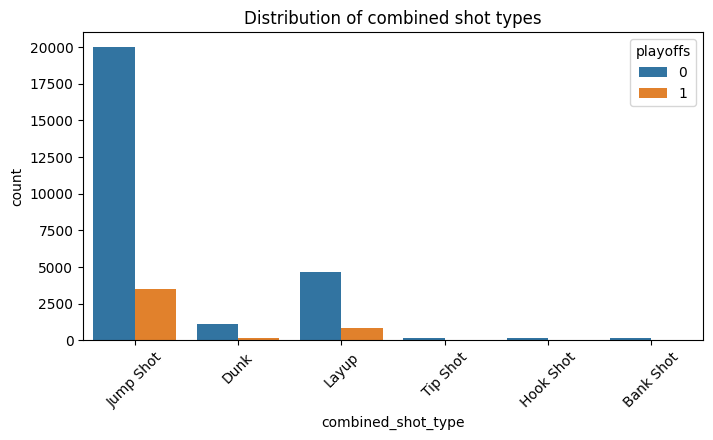

In [8]:
# plotting the distribution of combined shot types
plt.figure(figsize=(8, 4))

sns.countplot(
    data=df,
    x='combined_shot_type',
    hue='playoffs'
)

plt.title("Distribution of combined shot types")
plt.xticks(rotation=45)
plt.show()

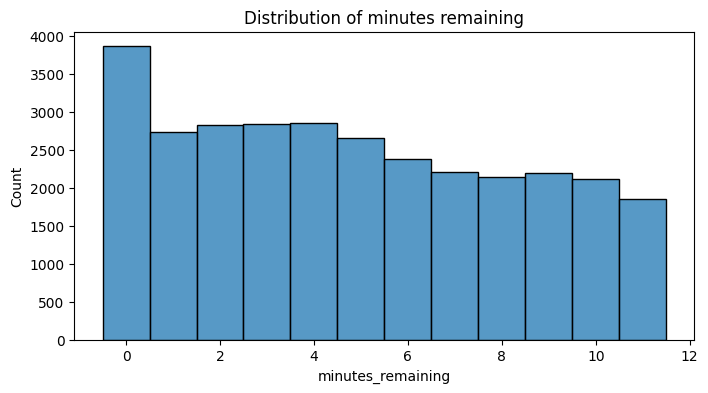

In [9]:
# plotting the distribution of minutes remaining
plt.figure(figsize=(8, 4))

sns.histplot(
    data=df,
    x='minutes_remaining',
    discrete=True
)

plt.title("Distribution of minutes remaining")
plt.show()

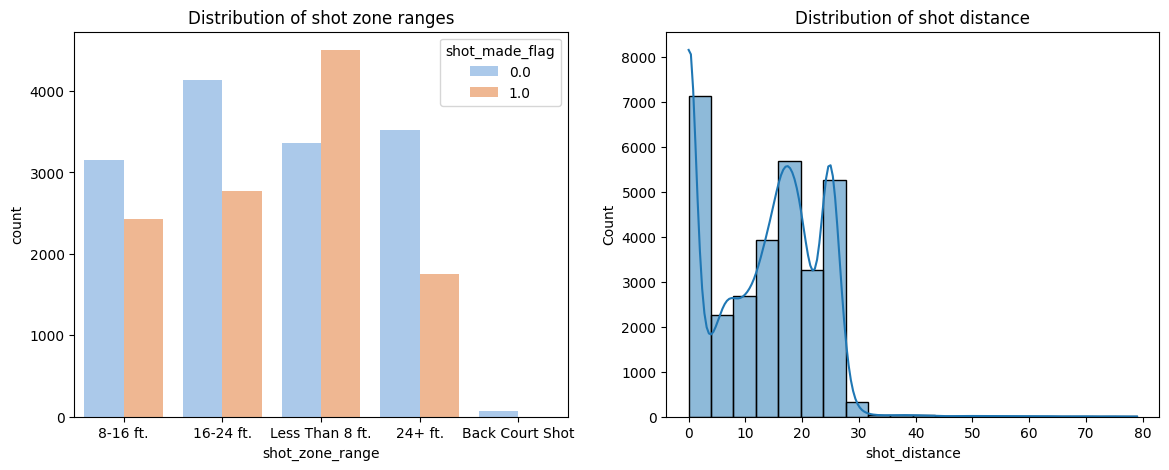

In [10]:
# plotting the distribution of shot zone range
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(
    data=df.dropna(),
    x='shot_zone_range',
    hue='shot_made_flag',
    palette='pastel',
    ax=ax[0]
)

ax[0].set_title("Distribution of shot zone ranges")

# plotting the distribution of shot distance
sns.histplot(
    data=df,
    x='shot_distance',
    bins=20,
    discrete=False,
    kde=True,
    ax=ax[1]
)

ax[1].set_title("Distribution of shot distance")

plt.show()

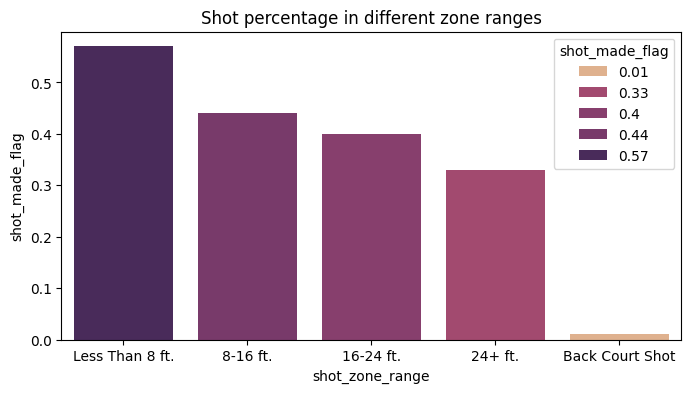

In [11]:
# calculating the shot percentage on different zone ranges
df_zone_ranges = df.dropna().groupby(
    by='shot_zone_range',
    as_index=False
).agg({'shot_made_flag': 'mean'})

df_zone_ranges['shot_made_flag'] = df_zone_ranges['shot_made_flag'].round(2)

# plotting the shot percentage on different zone ranges
plt.figure(figsize=(8, 4))

sns.barplot(
    data=df_zone_ranges.sort_values(
        by='shot_made_flag',
        ascending=False
    ).reset_index(drop=True),
    x='shot_zone_range',
    y='shot_made_flag',
    hue='shot_made_flag',
    palette='flare'
)

plt.title("Shot percentage in different zone ranges")
plt.show()

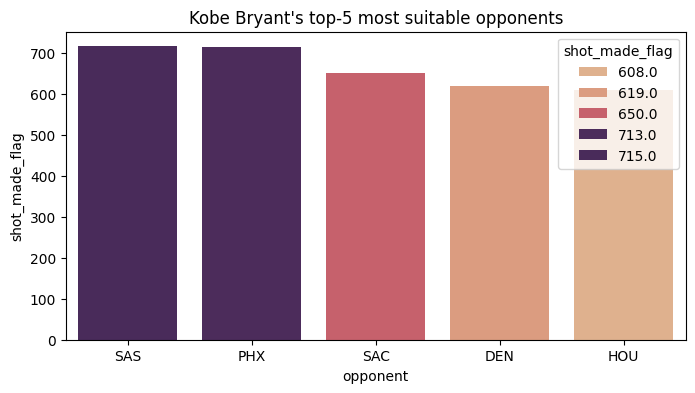

In [12]:
# finding the most suitable opponents for Kobe Bryant
df_best_target = df.dropna().groupby(
    by='opponent',
    as_index=False
)['shot_made_flag'].sum()

df_best_target.sort_values(
    by='shot_made_flag',
    ascending=False,
    inplace=True,
    ignore_index=True
)

# plotting top-5 most suitable opponents
plt.figure(figsize=(8, 4))

sns.barplot(
    data=df_best_target.head(),
    x='opponent',
    y='shot_made_flag',
    hue='shot_made_flag',
    palette='flare'
)

plt.title("Kobe Bryant's top-5 most suitable opponents")
plt.show()

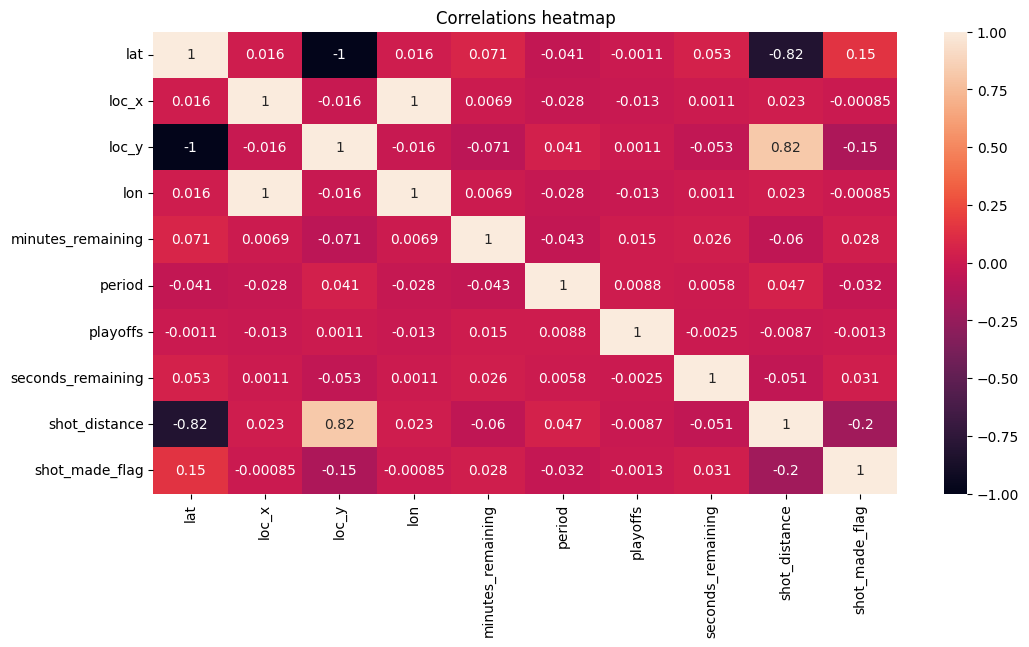

In [13]:
# checking correlations between numeric columns
df_corr = df.drop(['game_event_id', 'game_id', 'team_id', 'shot_id'], axis=1).corr(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True)
plt.title("Correlations heatmap")
plt.show()